In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error


## Contents

**[1. Examining Impact of Alternative Features in Group_1](#1.-Examining-Impact-of-Alternative-Features-in-Group-1)**
- [1.1. Scoring on Traditional Features](#1.1.-Scoring-on-Traditional-Features)
- [1.2. Scoring on Full Features](#1.2.-Scoring-on-Full-Features)
- [1.3. Feature Importances](#1.3.-Feature-Importances)
- [1.4. Comparison of ROC Curve](#1.4.-Comparison-of-ROC-Curve)

**[2. Examining Impact of Alternative Features in Group_2](#2.-Examining-Impact-of-Alternative-Features-in-Group-2)**
- [2.1. Scoring on Traditional Features](#2.1.-Scoring-on-Traditional-Features)
- [2.2. Scoring on Full Features](#2.2.-Scoring-on-Full-Features)
- [2.3. Feature Importances](#2.3.-Feature-Importances)
- [2.4. Comparison of ROC Curve](#2.4.-Comparison-of-ROC-Curve)
- [2.5. Examining the Impact of Different Sets of Alternative Features](#2.5.-Examining-the-Impact-of-Different-Sets-of-Alternative-Features)

**[3. Examining Impact of Alternative Features in Group_3](#3.-Examining-Impact-of-Alternative-Features-in-Group-3)**
- [3.1. Scoring on Traditional Features](#3.1.-Scoring-on-Traditional-Features)
- [3.2. Scoring on Full Features](#3.2.-Scoring-on-Full-Features)
- [3.3. Feature Importances](#3.3.-Feature-Importances)
- [3.4. Comparison of ROC Curve](#3.4.-Comparison-of-ROC-Curve)
- [3.5. Examining the Impact of Different Sets of Alternative Features](#3.5.-Examining-the-Impact-of-Different-Sets-of-Alternative-Features)
   
**[4. Examining Impact of Alternative Features in Group 4](#4.-Examining-Impact-of-Alternative-Features-in-Group-4)**
- [4.1. Scoring on Traditional Features](#4.1.-Scoring-on-Traditional-Features)
- [4.2. Scoring on Full Features](#4.2.-Scoring-on-Full-Features)
- [4.3. Feature Importances](#4.3.-Feature-Importances)
- [4.4. Comparison of ROC Curve](#4.4.-Comparison-of-ROC-Curve)
- [4.5. Examining the Impact of Different Sets of Alternative Features](#4.5.-Examining-the-Impact-of-Different-Sets-of-Alternative-Features)

**[5. Generating Predictions on Test Set](#5.-Generating-Predictions-on-Test-Set)**
- [5.1. Fitting and Predicting: Group 1](#5.1.-Fitting-and-Predicting:-Group-1)
- [5.2. Fitting and Predicting: Group 2](#5.2.-Fitting-and-Predicting:-Group-2)
- [5.3. Fitting and Predicting: Group 3](#5.3.-Fitting-and-Predicting:-Group-3)
- [5.4. Fitting and Predicting: Group 4](#5.4.-Fitting-and-Predicting:-Group-4)
- [5.5. Submitting to Kaggle](#5.5.-Submitting-to-Kaggle)

We examine the impact on alternative features on the scoring by running the dataset with and without these alternative features.

In [3]:
# reading train and test datasets
train_1 = pd.read_csv('../datasets/train_1_final.csv')
train_2 = pd.read_csv('../datasets/train_2_final.csv')
train_3 = pd.read_csv('../datasets/train_3_final.csv')
train_4 = pd.read_csv('../datasets/train_4_final.csv')

test_1 = pd.read_csv('../datasets/test_1_final.csv')
test_2 = pd.read_csv('../datasets/test_2_final.csv')
test_3 = pd.read_csv('../datasets/test_3_final.csv')
test_4 = pd.read_csv('../datasets/test_4_final.csv')

In [3]:
print(train_1.shape)
print(test_1.shape)
print()

print(train_2.shape)
print(test_2.shape)
print()

print(train_3.shape)
print(test_3.shape)
print()

print(train_4.shape)
print(test_4.shape)


(248631, 585)
(41430, 582)

(14859, 182)
(890, 164)

(41433, 505)
(6203, 498)

(2587, 96)
(221, 77)


## 1. Examining Impact of Alternative Features in Group 1
`Repeat customers with bureau reports`<br>
[top](#Contents)

In [4]:
# recall the alternative features we identified in train_1
alternative_feat_1 = [
    'DAYS_ID_PUBLISH',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE', 
    'FLAG_PHONE',
    'REGION_RATING_CLIENT_W_CITY',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 
    'DAYS_LAST_PHONE_CHANGE', 
    'CAR_BINS',
    'FAM_MEMBERS_BIN', 
    'AVG_OBS_CNT_SOCIAL_CIRCLE', 
    'AVG_DEF_CNT_SOCIAL_CIRCLE', 
    'RATIO_DEF_OBS_SOCIAL_CIRCLE',
    'NAME_TYPE_SUITE_Children',
    'NAME_TYPE_SUITE_Family',
    'NAME_TYPE_SUITE_Group_of_people',
    'NAME_TYPE_SUITE_Other_A',
    'NAME_TYPE_SUITE_Other_B',
    'NAME_TYPE_SUITE_Spouse_partner',
    'NAME_TYPE_SUITE_Unaccompanied',
    'WEEKDAY_APPR_PROCESS_START_MONDAY',
    'WEEKDAY_APPR_PROCESS_START_TUESDAY',
    'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
    'WEEKDAY_APPR_PROCESS_START_THURSDAY',
    'WEEKDAY_APPR_PROCESS_START_FRIDAY',
    'WEEKDAY_APPR_PROCESS_START_SATURDAY',
    'WEEKDAY_APPR_PROCESS_START_SUNDAY',
    'NAME_FAMILY_STATUS_Civil_marriage',
    'NAME_FAMILY_STATUS_Married',
    'NAME_FAMILY_STATUS_Separated',
    'NAME_FAMILY_STATUS_Single_not_married',
    'NAME_FAMILY_STATUS_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Children_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Children_Married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Children_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Family_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Family_Married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Family_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Married',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Widow', 
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Widow',
    'PROCESS_START_PERIOD_afternoon',
    'PROCESS_START_PERIOD_dusk',
    'PROCESS_START_PERIOD_morning',    
    'PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN',
    'PREV_NAME_TYPE_SUITE_Children_MEAN',
    'PREV_NAME_TYPE_SUITE_Family_MEAN',
    'PREV_NAME_TYPE_SUITE_Group_of_people_MEAN',
    'PREV_NAME_TYPE_SUITE_Other_A_MEAN',
    'PREV_NAME_TYPE_SUITE_Other_B_MEAN',
    'PREV_NAME_TYPE_SUITE_Spouse_partner_MEAN',
    'PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN',
    'PREV_HOUR_APPR_PROCESS_START_morning_MEAN',
    'PREV_HOUR_APPR_PROCESS_START_afternoon_MEAN',
    'PREV_HOUR_APPR_PROCESS_START_dusk_MEAN',
    'APPR_PROCESS_START_DIV_morning',
    'APPR_PROCESS_START_DIV_afternoon',
    'APPR_PROCESS_START_DIV_dusk',
    'NAME_TYPE_SUITE_DIV_Children', 
    'NAME_TYPE_SUITE_DIV_Family',
    'NAME_TYPE_SUITE_DIV_Group_of_people',
    'NAME_TYPE_SUITE_DIV_Other_A',
    'NAME_TYPE_SUITE_DIV_Other_B',
    'NAME_TYPE_SUITE_DIV_Spouse_partner',
    'NAME_TYPE_SUITE_DIV_Unaccompanied',
    'WEEKDAY_APPR_PROCESS_DIV_MONDAY',
    'WEEKDAY_APPR_PROCESS_DIV_TUESDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_WEDNESDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_THURSDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_FRIDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_SATURDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_SUNDAY',   
]

### 1.1. Scoring on Traditional Features
[top](#Contents)

In [5]:
train_1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,NAME_HOUSING_TYPE_CONVERT,AGE,DAYS_EMPLOYED_PENSION,YRS_EMPLOYED,HAVE_CHILDREN,LOAN_INCOME_RATIO,ANNUITY_INCOME_RATIO,CAR_BINS,FAM_MEMBERS_BIN,AVG_EXT_SOURCE,AVG_OBS_CNT_SOCIAL_CIRCLE,AVG_DEF_CNT_SOCIAL_CIRCLE,RATIO_DEF_OBS_SOCIAL_CIRCLE,INS_SK_ID_PREV_NUNIQUE,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_MIN,INS_DAYS_ENTRY_PAYMENT_MAX,INS_AMT_INSTALMENT_MEAN,INS_AMT_INSTALMENT_MIN,INS_AMT_INSTALMENT_MAX,INS_AMT_INSTALMENT_STD,INS_AMT_PAYMENT_MEAN,INS_AMT_PAYMENT_MIN,INS_AMT_PAYMENT_MAX,INS_AMT_PAYMENT_STD,INS_DAYS_BEFORE_DUE_MEAN,INS_DAYS_BEFORE_DUE_MAX,INS_DAYS_BEFORE_DUE_STD,INS_DAYS_PAST_DUE_MEAN,INS_DAYS_PAST_DUE_MAX,INS_DAYS_PAST_DUE_STD,INS_FLAG_LATE_PAY_MEAN,INS_FLAG_LATE_PAY_SUM,INS_INSTALL_PAY_RATIO_MEAN,INS_INSTALL_PAY_RATIO_STD,INS_LATE_PAY_RATIO_MEAN,INS_LATE_PAY_RATIO_STD,INS_SIGNIFICANT_LATE_PAY_MEAN,INS_SIGNIFICANT_LATE_PAY_SUM,INS_FLAG_15DAYS_DUE_MEAN,INS_FLAG_30DAYS_DUE_MEAN,INS_FLAG_60DAYS_DUE_MEAN,INS_PAYMENT_RATIO_MEAN,INS_FLAG_PAYMENT_OVER_MEAN,INS_24M_SK_ID_PREV_SIZE,INS_24M_DAYS_ENTRY_PAYMENT_MEAN,INS_24M_DAYS_ENTRY_PAYMENT_MIN,INS_24M_DAYS_ENTRY_PAYMENT_MAX,INS_24M_AMT_INSTALMENT_MEAN,INS_24M_AMT_INSTALMENT_MIN,INS_24M_AMT_INSTALMENT_MAX,INS_24M_AMT_INSTALMENT_STD,INS_24M_AMT_PAYMENT_MEAN,INS_24M_AMT_PAYMENT_MIN,INS_24M_AMT_PAYMENT_MAX,INS_24M_AMT_PAYMENT_STD,INS_24M_DAYS_BEFORE_DUE_MEAN,INS_24M_DAYS_BEFORE_DUE_MAX,INS_24M_DAYS_BEFORE_DUE_STD,INS_24M_DAYS_PAST_DUE_MEAN,INS_24M_DAYS_PAST_DUE_MAX,INS_24M_DAYS_PAST_DUE_STD,INS_24M_FLAG_LATE_PAY_MEAN,INS_24M_FLAG_LATE_PAY_SUM,INS_24M_INSTALL_PAY_RATIO_MEAN,INS_24M_INSTALL_PAY_RATIO_STD,INS_24M_LATE_PAY_RATIO_MEAN,INS_24M_LATE_PAY_RATIO_STD,INS_24M_SIGNIFICANT_LATE_PAY_MEAN,INS_24M_SIGNIFICANT_LATE_PAY_SUM,INS_24M_FLAG_15DAYS_DUE_MEAN,INS_24M_FLAG_30DAYS_DUE_MEAN,INS_24M_FLAG_60DAYS_DUE_MEAN,INS_24M_PAYMENT_RATIO_MEAN,INS_24M_FLAG_PAYMENT_OVER_MEAN,INS_48M_SK_ID_PREV_SIZE,INS_48M_DAYS_ENTRY_PAYMENT_MEAN,INS_48M_DAYS_ENTRY_PAYMENT_MIN,INS_48M_DAYS_ENTRY_PAYMENT_MAX,INS_48M_AMT_INSTALMENT_MEAN,INS_48M_AMT_INSTALMENT_MIN,INS_48M_AMT_INSTALMENT_MAX,INS_48M_AMT_INSTALMENT_STD,INS_48M_AMT_PAYMENT_MEAN,INS_48M_AMT_PAYMENT_MIN,INS_48M_AMT_PAYMENT_MAX,INS_48M_AMT_PAYMENT_STD,INS_48M_DAYS_BEFORE_DUE_MEAN,INS_48M_DAYS_BEFORE_DUE_MAX,INS_48M_DAYS_BEFORE_DUE_STD,INS_48M_DAYS_PAST_DUE_MEAN,INS_48M_DAYS_PAST_DUE_MAX,INS_48M_DAYS_PAST_DUE_STD,INS_48M_FLAG_LATE_PAY_MEAN,INS_48M_FLAG_LATE_PAY_SUM,INS_48M_INSTALL_PAY_RATIO_MEAN,INS_48M_INSTALL_PAY_RATIO_STD,INS_48M_LATE_PAY_RATIO_MEAN,INS_48M_LATE_PAY_RATIO_STD,INS_48M_SIGNIFICANT_LATE_PAY_MEAN,INS_48M_SIGNIFICANT_LATE_PAY_SUM,INS_48M_FLAG_15DAYS_DUE_MEAN,INS_48M_FLAG_30DAYS_DUE_MEAN,INS_48M_FLAG_60DAYS_DUE_MEAN,INS_48M_PAYMENT_RATIO_MEAN,INS_48M_FLAG_PAYMENT_OVER_MEAN,CC_MONTHS_BALANCE_MIN,CC_AMT_BALANCE_MAX,CC_AMT_BALANCE_MEAN,CC_AMT_CREDIT_LIMIT_ACTUAL_MAX,CC_AMT_DRAWINGS_ATM_CURRENT_MAX,CC_AMT_DRAWINGS_ATM_CURRENT_SUM,CC_AMT_DRAWINGS_CURRENT_MAX,CC_AMT_DRAWINGS_CURRENT_SUM,CC_AMT_DRAWINGS_POS_CURRENT_MAX,CC_AMT_DRAWINGS_POS_CURRENT_SUM,CC_AMT_INST_MIN_REGULARITY_MAX,CC_AMT_INST_MIN_REGULARITY_MEAN,CC_AMT_PAYMENT_TOTAL_CURRENT_MAX,CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_AMT_PAYMENT_TOTAL_CURRENT_SUM,CC_AMT_PAYMENT_TOTAL_CURRENT_STD,CC_AMT_TOTAL_RECEIVABLE_MAX,CC_AMT_TOTAL_RECEIVABLE_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_MAX,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWIN

In [6]:
# create set that does not have the full alternative features
train_1_trad = train_1.drop(alternative_feat_1, axis=1)

In [7]:
X = train_1_trad.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_1_trad['TARGET']

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [9]:
# scoring on xgb model
print('Scoring on xgb model...')
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=['auc'], n_jobs=-1)

auc_roc = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

xgb.fit(X_train, y_train)
preds = xgb.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, xgb.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, xgb.predict(X_val)))

Scoring on xgb model...
Average training ROC cross-val-score over 5 folds: 0.7604082428796048
Cross-val-scores over 5 folds: [0.75539084 0.7567125  0.76129732 0.7640894  0.76455116]
AUC score on validation set: 0.7692873444574633

Confusion Matrix:
[[68373   369]
 [ 5515   333]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     68742
           1       0.47      0.06      0.10      5848

    accuracy                           0.92     74590
   macro avg       0.70      0.53      0.53     74590
weighted avg       0.89      0.92      0.89     74590



In [10]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb.fit(X_train, y_train)
preds = lgb.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.775506433332452
Cross-val-scores over 5 folds: [0.76728193 0.76972101 0.78124488 0.77960491 0.77967945]
AUC score on validation set: 0.7827743994963463

Confusion Matrix:
[[50618 18124]
 [ 1839  4009]]

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     68742
           1       0.18      0.69      0.29      5848

    accuracy                           0.73     74590
   macro avg       0.57      0.71      0.56     74590
weighted avg       0.90      0.73      0.79     74590



### 1.2. Scoring on Full Features
[top](#Contents)

In [11]:
X_full = train_1.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y_full = train_1['TARGET']

X_full_train, X_full_val, y_full_train, y_full_val = train_test_split(X_full, y_full, test_size = 0.3, stratify=y, random_state=42)

In [12]:
# scoring on xgb model
print('Scoring on xgb model...')
xgb_full = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=['auc'], n_jobs=-1)

auc_roc = cross_val_score(xgb_full, X_full_train, y_full_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

xgb_full.fit(X_full_train, y_full_train)
preds = xgb_full.predict_proba(X_full_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_full_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_full_val, xgb_full.predict(X_full_val)))
print()
print('Classification report:')
print(classification_report(y_full_val, xgb_full.predict(X_full_val)))

Scoring on xgb model...
Average training ROC cross-val-score over 5 folds: 0.7621471753795851
Cross-val-scores over 5 folds: [0.75338359 0.75955548 0.76539641 0.76763369 0.7647667 ]
AUC score on validation set: 0.7680817011175354

Confusion Matrix:
[[68306   436]
 [ 5466   382]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     68742
           1       0.47      0.07      0.11      5848

    accuracy                           0.92     74590
   macro avg       0.70      0.53      0.54     74590
weighted avg       0.89      0.92      0.89     74590



In [13]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_full = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_full, X_full_train, y_full_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_full.fit(X_full_train, y_full_train)
preds = lgb_full.predict_proba(X_full_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_full_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_full_val, lgb_full.predict(X_full_val)))
print()
print('Classification report:')
print(classification_report(y_full_val, lgb_full.predict(X_full_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7768077297563272
Cross-val-scores over 5 folds: [0.76845103 0.77100575 0.7821105  0.78148876 0.78098261]
AUC score on validation set: 0.7837456653580602

Confusion Matrix:
[[50689 18053]
 [ 1830  4018]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     68742
           1       0.18      0.69      0.29      5848

    accuracy                           0.73     74590
   macro avg       0.57      0.71      0.56     74590
weighted avg       0.90      0.73      0.79     74590



### 1.3. Feature Importances
[top](#Contents)

In [14]:
features = X.columns
features_full = X_full.columns

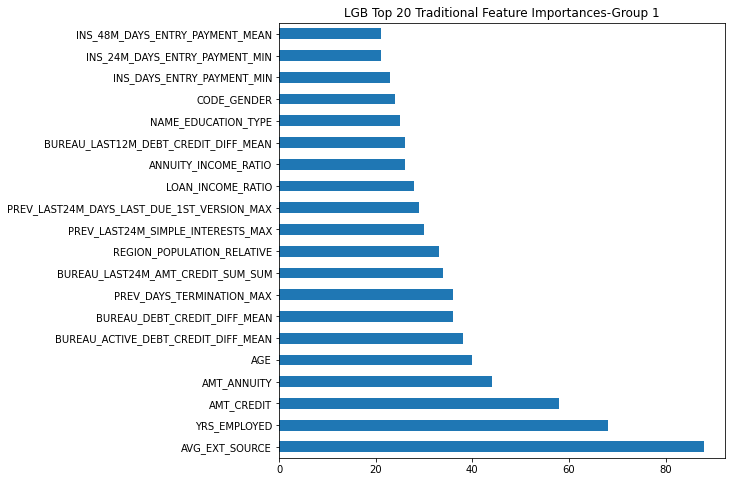

In [15]:
# access feature importances
# for traditional features
feat_imp = lgb.feature_importances_

lgb_feat_imp = pd.Series(feat_imp, features).sort_values(ascending=False)

# getting the top 20 features
lgb_top20 = lgb_feat_imp[:20]

# plot top 20 features
plt.figure(figsize=(8,8))
lgb_top20.plot(kind='barh', title='LGB Top 20 Traditional Feature Importances-Group 1')
plt.show();

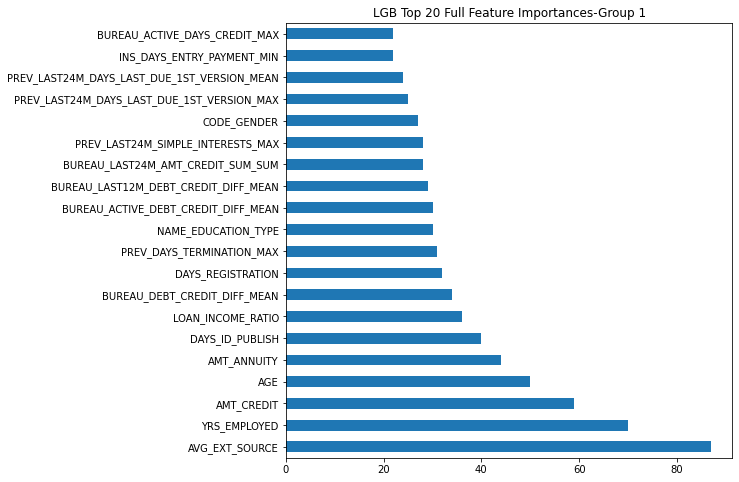

In [16]:
# access feature importances
# for full features
feat_imp_full = lgb_full.feature_importances_

lgb_feat_imp_full = pd.Series(feat_imp_full, features_full).sort_values(ascending=False)

# getting the top 20 features
lgb_top20_full = lgb_feat_imp_full[:20]

# plot top 20 features
plt.figure(figsize=(8,8))
lgb_top20_full.plot(kind='barh', title='LGB Top 20 Full Feature Importances-Group 1')
plt.show();

**XGB model:**<br>
There was a marginal improvement in AUC score of 0.002 in the average cross-val-score in the full features model to 0.762, however when tested on the validation set, the AUC score for full features was 0.768, 0.001 lower than the AUC score of 0.769 scored for the traditional features. 

**LGB model:**<br>
Likewise, there was a marginal improvement in AUC score of 0.001 in the average cross-val-score in the full features model to 0.777. Addtionally, when tested on the validation set, the AUC score for full features was 0.784, 0.001 higher than the AUC score of 0.783 scored for the traditional features. 

Overall, the LGB model had a much higher recall score, shown in the reduction of false negatives compared to the XGB model. However, it sacrificed precision as it had a high number of false positives. <br>

The alternative features seem to have little impact except for `DAYS_ID_PUBLISH` which was the only traditional feature in the top20 in the full features model. Perhaps alternative features have less of a role to play especially when other features are available, especially past records of payment and borrowings. Hence, alternative features are like substitutes to these features that look at intrinsic qualities or characteristics. 

### 1.4. Comparison of ROC Curve
[top](#Contents)

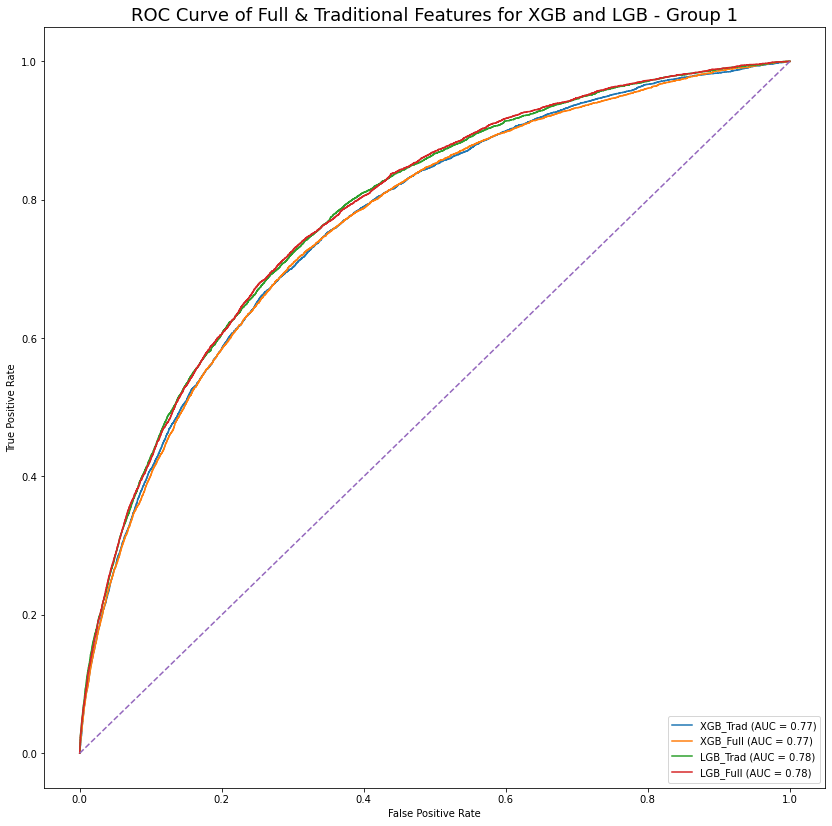

In [17]:
figure = plt.figure(figsize=(14,14))
ax = plt.gca()
xgb_chart = plot_roc_curve(xgb, X_val, y_val, name='XGB_Trad', ax=ax)
xgb_full_chart = plot_roc_curve(xgb_full, X_full_val, y_full_val, name='XGB_Full', ax=ax)

lgb_chart = plot_roc_curve(lgb, X_val, y_val, name='LGB_Trad', ax=ax)
lgb_full_chart = plot_roc_curve(lgb_full, X_full_val, y_full_val, name='LGB_Full', ax=ax)

ax.plot(np.linspace(0, 1, 200),
        np.linspace(0, 1, 200),
        linestyle='--')
plt.title('ROC Curve of Full & Traditional Features for XGB and LGB - Group 1', fontsize=18)
plt.show()

From the ROC curve above, the LGB model was clearly dominant over the XGB model. 

## 2. Examining Impact of Alternative Features in Group 2
`New customers with bureau reports`<br>
[top](#Contents)

### 2.1. Scoring on Traditional Features
[top](#Contents)

In [18]:
# for group 2
alternative_feat_2 = [
    'DAYS_ID_PUBLISH',
    'FLAG_EMP_PHONE', 
    'FLAG_WORK_PHONE', 
    'FLAG_CONT_MOBILE', 
    'FLAG_PHONE',
    'REGION_RATING_CLIENT_W_CITY',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 
    'DAYS_LAST_PHONE_CHANGE', 
    'CAR_BINS',
    'FAM_MEMBERS_BIN', 
    'AVG_OBS_CNT_SOCIAL_CIRCLE', 
    'AVG_DEF_CNT_SOCIAL_CIRCLE', 
    'RATIO_DEF_OBS_SOCIAL_CIRCLE',
    'NAME_TYPE_SUITE_Children',
    'NAME_TYPE_SUITE_Family',
    'NAME_TYPE_SUITE_Group_of_people',
    'NAME_TYPE_SUITE_Other_A',
    'NAME_TYPE_SUITE_Other_B',
    'NAME_TYPE_SUITE_Spouse_partner',
    'NAME_TYPE_SUITE_Unaccompanied',
    'WEEKDAY_APPR_PROCESS_START_MONDAY',
    'WEEKDAY_APPR_PROCESS_START_TUESDAY',
    'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
    'WEEKDAY_APPR_PROCESS_START_THURSDAY',
    'WEEKDAY_APPR_PROCESS_START_FRIDAY',
    'WEEKDAY_APPR_PROCESS_START_SATURDAY',
    'WEEKDAY_APPR_PROCESS_START_SUNDAY',
    'NAME_FAMILY_STATUS_Civil_marriage',
    'NAME_FAMILY_STATUS_Married',
    'NAME_FAMILY_STATUS_Separated',
    'NAME_FAMILY_STATUS_Single_not_married',
    'NAME_FAMILY_STATUS_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Children_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Children_Married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Children_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Family_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Family_Married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Family_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Married',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Widow',
    'PROCESS_START_PERIOD_afternoon',
    'PROCESS_START_PERIOD_dusk',
    'PROCESS_START_PERIOD_morning',  
]

In [19]:
# create set that does not have the full alternative features
train_2_trad = train_2.drop(alternative_feat_2, axis=1)

X = train_2_trad.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_2_trad['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [20]:
# scoring on xgb model
print('Scoring on xgb model...')
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=['auc'], n_jobs=-1)

auc_roc = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

xgb.fit(X_train, y_train)
preds = xgb.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, xgb.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, xgb.predict(X_val)))

Scoring on xgb model...
Average training ROC cross-val-score over 5 folds: 0.7268552296405332
Cross-val-scores over 5 folds: [0.71886029 0.72645222 0.73357725 0.72234967 0.73303671]
AUC score on validation set: 0.7200196115529874

Confusion Matrix:
[[4173   23]
 [ 251   11]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4196
           1       0.32      0.04      0.07       262

    accuracy                           0.94      4458
   macro avg       0.63      0.52      0.52      4458
weighted avg       0.91      0.94      0.92      4458



In [21]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb.fit(X_train, y_train)
preds = lgb.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7370888331006451
Cross-val-scores over 5 folds: [0.71291429 0.73551131 0.73384936 0.74515648 0.75801272]
AUC score on validation set: 0.7307441110763432

Confusion Matrix:
[[3912  284]
 [ 192   70]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4196
           1       0.20      0.27      0.23       262

    accuracy                           0.89      4458
   macro avg       0.58      0.60      0.58      4458
weighted avg       0.91      0.89      0.90      4458



### 2.2. Scoring on Full Features
[top](#Contents)

In [22]:
X_full = train_2.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y_full = train_2['TARGET']

X_full_train, X_full_val, y_full_train, y_full_val = train_test_split(X_full, y_full, test_size = 0.3, stratify=y, random_state=42)

In [23]:
# scoring on xgb model
print('Scoring on xgb model...')
xgb_full = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=['auc'], n_jobs=-1)

auc_roc = cross_val_score(xgb_full, X_full_train, y_full_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

xgb_full.fit(X_full_train, y_full_train)
preds = xgb_full.predict_proba(X_full_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_full_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_full_val, xgb_full.predict(X_full_val)))
print()
print('Classification report:')
print(classification_report(y_full_val, xgb_full.predict(X_full_val)))

Scoring on xgb model...
Average training ROC cross-val-score over 5 folds: 0.741978141362695
Cross-val-scores over 5 folds: [0.72488519 0.74506648 0.73005241 0.7467682  0.76311843]
AUC score on validation set: 0.7277323368675366

Confusion Matrix:
[[4177   19]
 [ 249   13]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4196
           1       0.41      0.05      0.09       262

    accuracy                           0.94      4458
   macro avg       0.67      0.52      0.53      4458
weighted avg       0.91      0.94      0.92      4458



In [24]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_full = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_full, X_full_train, y_full_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_full.fit(X_full_train, y_full_train)
preds = lgb_full.predict_proba(X_full_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_full_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_full_val, lgb_full.predict(X_full_val)))
print()
print('Classification report:')
print(classification_report(y_full_val, lgb_full.predict(X_full_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7481539010683695
Cross-val-scores over 5 folds: [0.73047825 0.74708635 0.75707899 0.74663424 0.75949167]
AUC score on validation set: 0.7267672228731107

Confusion Matrix:
[[3933  263]
 [ 194   68]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4196
           1       0.21      0.26      0.23       262

    accuracy                           0.90      4458
   macro avg       0.58      0.60      0.59      4458
weighted avg       0.91      0.90      0.90      4458



### 2.3. Feature Importances
[top](#Contents)

In [25]:
features = X.columns
features_full = X_full.columns

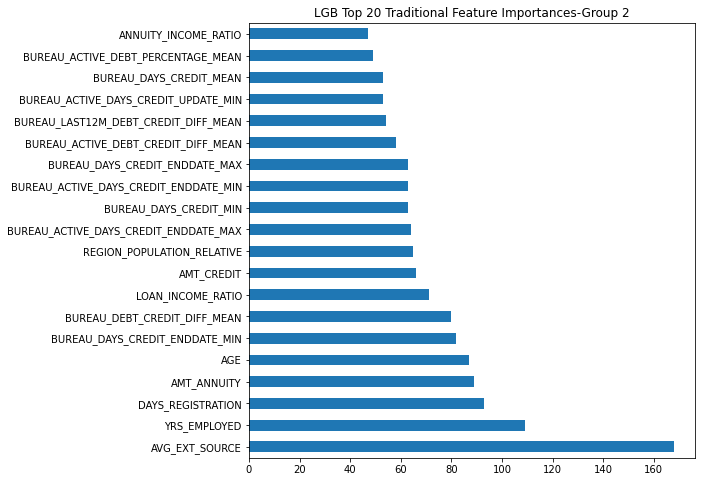

In [26]:
# access feature importances
# for traditional features
feat_imp = lgb.feature_importances_

lgb_feat_imp = pd.Series(feat_imp, features).sort_values(ascending=False)

# getting the top 20 features
lgb_top20 = lgb_feat_imp[:20]

# plot top 20 features
plt.figure(figsize=(8,8))
lgb_top20.plot(kind='barh', title='LGB Top 20 Traditional Feature Importances-Group 2')
plt.show();

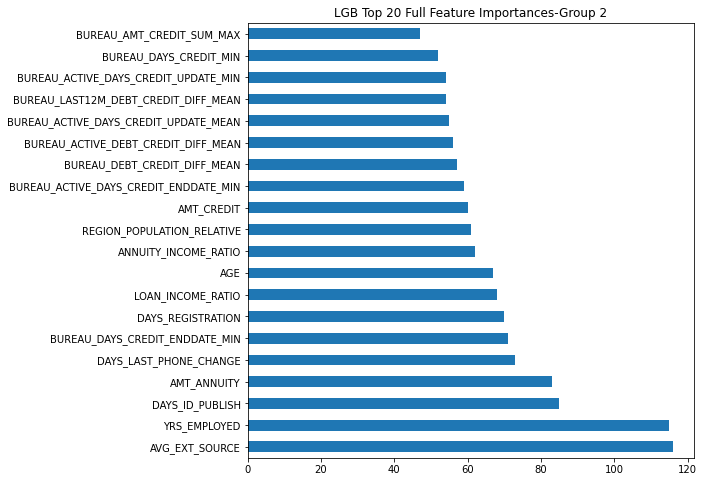

In [27]:
# access feature importances
# for full features
feat_imp_full = lgb_full.feature_importances_

lgb_feat_imp_full = pd.Series(feat_imp_full, features_full).sort_values(ascending=False)

# getting the top 20 features
lgb_top20_full = lgb_feat_imp_full[:20]

# plot top 20 features
plt.figure(figsize=(8,8))
lgb_top20_full.plot(kind='barh', title='LGB Top 20 Full Feature Importances-Group 2')
plt.show();

**XGB model:**<br>
There was an improvement in AUC score of 0.015 in the average cross-val-score in the full features model to 0.742.Tested on the validation set, the AUC score for full features was 0.728, 0.007 higher than the AUC score of 0.720 scored for the traditional features. 

**LGB model:**<br>
Likewise, there was a marginal improvement in AUC score of 0.011 in the average cross-val-score in the full features model to 0.748. However, when tested on the validation set, the AUC score for full features was 0.727, 0.004 lower than the AUC score of 0.731 scored for the traditional features. 

Overall, the LGB model still had a much higher recall score, shown in the reduction of false negatives compared to the XGB model although precision scores were lower due to the increased in number of false positives. Both models also tend to slightly overfit compared to the validation set.

Looking at the feature importances based on the LGB model, the full features had a number of alternative features like `DAYS_ID_PUBLISH`, `DAYS_LAST_PHONE_CHANGE` in the top 20 features.  

### 2.4. Comparison of ROC Curve
[top](#Contents)

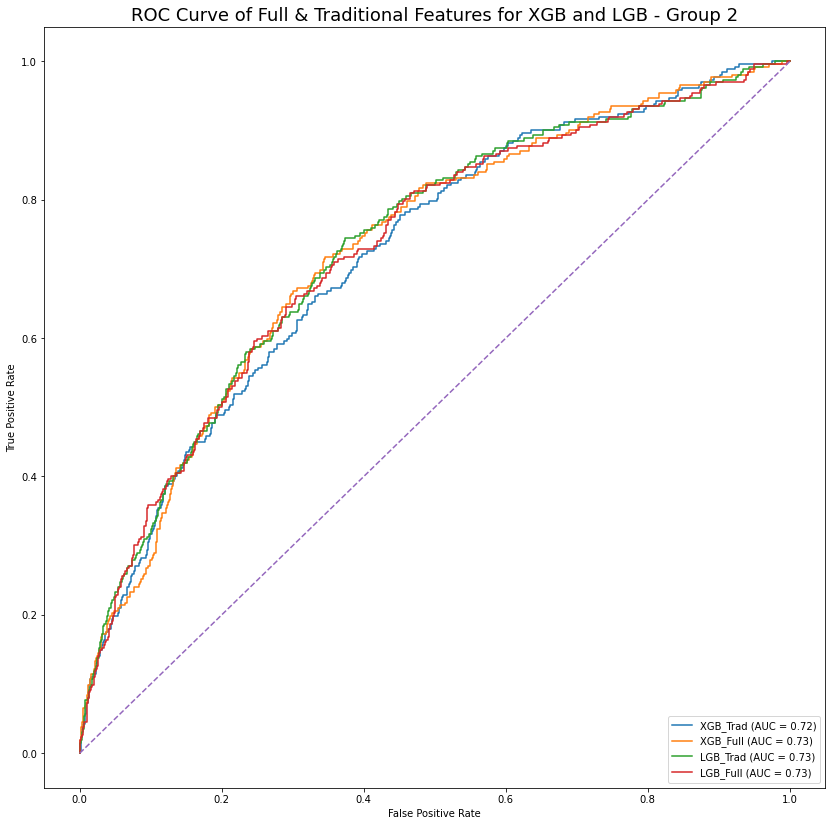

In [28]:
figure = plt.figure(figsize=(14,14))
ax = plt.gca()
xgb_chart = plot_roc_curve(xgb, X_val, y_val, name='XGB_Trad', ax=ax)
xgb_full_chart = plot_roc_curve(xgb_full, X_full_val, y_full_val, name='XGB_Full', ax=ax)

lgb_chart = plot_roc_curve(lgb, X_val, y_val, name='LGB_Trad', ax=ax)
lgb_full_chart = plot_roc_curve(lgb_full, X_full_val, y_full_val, name='LGB_Full', ax=ax)

ax.plot(np.linspace(0, 1, 200),
        np.linspace(0, 1, 200),
        linestyle='--')
plt.title('ROC Curve of Full & Traditional Features for XGB and LGB - Group 2', fontsize=18)
plt.show()

Compared to Group 1, the LGB model was not clearly dominant, in some portions of the AUC curve, the XGB_Full model was above the LGB_Full model instead. 

### 2.5. Examining the Impact of Different Sets of Alternative Features
[top](#Contents)

From our initial alternative features, we can group these features based on their similar categories to observe the impact on the AUC scores:
- mobile and phone observations
- social network observations
- consistency observations

In [29]:
phone_obs = [
    'FLAG_EMP_PHONE', 
    'FLAG_WORK_PHONE', 
    'FLAG_CONT_MOBILE', 
    'FLAG_PHONE',
    'DAYS_LAST_PHONE_CHANGE',
]

social_obs = [
    'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 
    'AVG_OBS_CNT_SOCIAL_CIRCLE', 
    'AVG_DEF_CNT_SOCIAL_CIRCLE', 
    'RATIO_DEF_OBS_SOCIAL_CIRCLE',
]

consist_obs = [
    'TYPE_SUITE_FAMILY_STATUS_Children_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Children_Married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Children_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Family_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Family_Married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Family_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Married',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Widow',
]

#### Dropping phone observations features

In [30]:
# create set that drops selected features
train_2_phone = train_2.drop(phone_obs, axis=1)

X = train_2_phone.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_2_phone['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [31]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_phone = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_phone, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_phone.fit(X_train, y_train)
preds = lgb_phone.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb_phone.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb_phone.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7390108617898777
Cross-val-scores over 5 folds: [0.7167302  0.73724443 0.73122457 0.74372478 0.76613034]
AUC score on validation set: 0.7255574192797212

Confusion Matrix:
[[3937  259]
 [ 195   67]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4196
           1       0.21      0.26      0.23       262

    accuracy                           0.90      4458
   macro avg       0.58      0.60      0.59      4458
weighted avg       0.91      0.90      0.90      4458



Average cross-val AUC fell 0.09 from 0.748 to 0.739, while the validation AUC fell 0.001 from 0.727 to 0.726. 

#### Dropping social observations features

In [32]:
# create set that drops selected features
train_2_social = train_2.drop(social_obs, axis=1)

X = train_2_social.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_2_social['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [33]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_social = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_social, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_social.fit(X_train, y_train)
preds = lgb_social.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb_social.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb_social.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7491528682796302
Cross-val-scores over 5 folds: [0.73585125 0.76022706 0.73966828 0.75252432 0.75749343]
AUC score on validation set: 0.7232078533536119

Confusion Matrix:
[[3907  289]
 [ 186   76]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4196
           1       0.21      0.29      0.24       262

    accuracy                           0.89      4458
   macro avg       0.58      0.61      0.59      4458
weighted avg       0.91      0.89      0.90      4458



Interestingly, the average cross-val AUC increased 0.001 from 0.748 to 0.749 while the validation AUC fell 0.004 from 0.727 to 0.723.

#### Dropping consistency observations features

In [34]:
# create set that drops selected features
train_2_consist = train_2.drop(consist_obs, axis=1)

X = train_2_consist.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_2_consist['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [35]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_consist = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_consist, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_consist.fit(X_train, y_train)
preds = lgb_consist.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb_consist.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb_consist.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7528413314211849
Cross-val-scores over 5 folds: [0.7278748  0.77108207 0.7420419  0.75362113 0.76958677]
AUC score on validation set: 0.7219061774572658

Confusion Matrix:
[[3957  239]
 [ 204   58]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4196
           1       0.20      0.22      0.21       262

    accuracy                           0.90      4458
   macro avg       0.57      0.58      0.58      4458
weighted avg       0.91      0.90      0.90      4458



Likewise, the average cross-val AUC increased 0.005 from 0.748 to 0.753 while the validation AUC fell 0.005 from 0.727 to 0.722.

Across the 3 sets of features that we drop, all shown a decrease in validation AUC, but the AUC for the average cross-val auc score was mixed with only the phone observations decreasing. 

## 3. Examining Impact of Alternative Features in Group 3
`Repeat customers without Bureau reports`<br>
[top](#Contents)

### 3.1. Scoring on Traditional Features
[top](#Contents)

In [36]:
# for group 3
alternative_feat_3 = [
    'DAYS_ID_PUBLISH',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE', 
    'FLAG_PHONE',
    'REGION_RATING_CLIENT_W_CITY',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 
    'DAYS_LAST_PHONE_CHANGE', 
    'CAR_BINS',
    'FAM_MEMBERS_BIN', 
    'AVG_OBS_CNT_SOCIAL_CIRCLE', 
    'AVG_DEF_CNT_SOCIAL_CIRCLE', 
    'RATIO_DEF_OBS_SOCIAL_CIRCLE',
    'NAME_TYPE_SUITE_Children',
    'NAME_TYPE_SUITE_Family',
    'NAME_TYPE_SUITE_Group_of_people',
    'NAME_TYPE_SUITE_Other_A',
    'NAME_TYPE_SUITE_Other_B',
    'NAME_TYPE_SUITE_Spouse_partner',
    'NAME_TYPE_SUITE_Unaccompanied',
    'WEEKDAY_APPR_PROCESS_START_MONDAY',
    'WEEKDAY_APPR_PROCESS_START_TUESDAY',
    'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
    'WEEKDAY_APPR_PROCESS_START_THURSDAY',
    'WEEKDAY_APPR_PROCESS_START_FRIDAY',
    'WEEKDAY_APPR_PROCESS_START_SATURDAY',
    'WEEKDAY_APPR_PROCESS_START_SUNDAY',
    'NAME_FAMILY_STATUS_Civil_marriage',
    'NAME_FAMILY_STATUS_Married',
    'NAME_FAMILY_STATUS_Separated',
    'NAME_FAMILY_STATUS_Single_not_married',
    'NAME_FAMILY_STATUS_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Children_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Children_Married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Children_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Family_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Family_Married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Family_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Married',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Widow', 
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Widow',
    'PROCESS_START_PERIOD_afternoon',
    'PROCESS_START_PERIOD_dusk',
    'PROCESS_START_PERIOD_morning',    
    'PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN',
    'PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN',
    'PREV_NAME_TYPE_SUITE_Children_MEAN',
    'PREV_NAME_TYPE_SUITE_Family_MEAN',
    'PREV_NAME_TYPE_SUITE_Group_of_people_MEAN',
    'PREV_NAME_TYPE_SUITE_Other_A_MEAN',
    'PREV_NAME_TYPE_SUITE_Other_B_MEAN',
    'PREV_NAME_TYPE_SUITE_Spouse_partner_MEAN',
    'PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN',
    'PREV_HOUR_APPR_PROCESS_START_morning_MEAN',
    'PREV_HOUR_APPR_PROCESS_START_afternoon_MEAN',
    'PREV_HOUR_APPR_PROCESS_START_dusk_MEAN',
    'APPR_PROCESS_START_DIV_morning',
    'APPR_PROCESS_START_DIV_afternoon',
    'APPR_PROCESS_START_DIV_dusk',
    'NAME_TYPE_SUITE_DIV_Children', 
    'NAME_TYPE_SUITE_DIV_Family',
    'NAME_TYPE_SUITE_DIV_Group_of_people',
    'NAME_TYPE_SUITE_DIV_Other_A',
    'NAME_TYPE_SUITE_DIV_Other_B',
    'NAME_TYPE_SUITE_DIV_Spouse_partner',
    'NAME_TYPE_SUITE_DIV_Unaccompanied',
    'WEEKDAY_APPR_PROCESS_DIV_MONDAY',
    'WEEKDAY_APPR_PROCESS_DIV_TUESDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_WEDNESDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_THURSDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_FRIDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_SATURDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_SUNDAY',   
]

In [37]:
# create set that does not have the full alternative features
train_3_trad = train_3.drop(alternative_feat_3, axis=1)

X = train_3_trad.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_3_trad['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [38]:
# scoring on xgb model
print('Scoring on xgb model...')
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=['auc'], n_jobs=-1)

auc_roc = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

xgb.fit(X_train, y_train)
preds = xgb.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, xgb.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, xgb.predict(X_val)))

Scoring on xgb model...
Average training ROC cross-val-score over 5 folds: 0.7145203242614662
Cross-val-scores over 5 folds: [0.70353577 0.71273901 0.71856158 0.727298   0.71046726]
AUC score on validation set: 0.7118760860426009

Confusion Matrix:
[[11005   145]
 [ 1195    85]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11150
           1       0.37      0.07      0.11      1280

    accuracy                           0.89     12430
   macro avg       0.64      0.53      0.53     12430
weighted avg       0.85      0.89      0.86     12430



In [39]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb.fit(X_train, y_train)
preds = lgb.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7389477971704694
Cross-val-scores over 5 folds: [0.73180017 0.73945921 0.73982068 0.75540976 0.72824916]
AUC score on validation set: 0.7396182735426009

Confusion Matrix:
[[8892 2258]
 [ 596  684]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     11150
           1       0.23      0.53      0.32      1280

    accuracy                           0.77     12430
   macro avg       0.58      0.67      0.59     12430
weighted avg       0.86      0.77      0.81     12430



### 3.2. Scoring on Full Features
[top](#Contents)

In [40]:
X_full = train_3.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y_full = train_3['TARGET']

X_full_train, X_full_val, y_full_train, y_full_val = train_test_split(X_full, y_full, test_size = 0.3, stratify=y, random_state=42)

In [41]:
# scoring on xgb model
print('Scoring on xgb model...')
xgb_full = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=['auc'], n_jobs=-1)

auc_roc = cross_val_score(xgb_full, X_full_train, y_full_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

xgb_full.fit(X_full_train, y_full_train)
preds = xgb_full.predict_proba(X_full_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_full_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_full_val, xgb_full.predict(X_full_val)))
print()
print('Classification report:')
print(classification_report(y_full_val, xgb_full.predict(X_full_val)))

Scoring on xgb model...
Average training ROC cross-val-score over 5 folds: 0.7216095973179166
Cross-val-scores over 5 folds: [0.71643253 0.71908576 0.72414082 0.73061766 0.71777122]
AUC score on validation set: 0.7206619955156951

Confusion Matrix:
[[11009   141]
 [ 1200    80]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11150
           1       0.36      0.06      0.11      1280

    accuracy                           0.89     12430
   macro avg       0.63      0.52      0.52     12430
weighted avg       0.85      0.89      0.86     12430



In [42]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_full = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_full, X_full_train, y_full_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_full.fit(X_full_train, y_full_train)
preds = lgb_full.predict_proba(X_full_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_full_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_full_val, lgb_full.predict(X_full_val)))
print()
print('Classification report:')
print(classification_report(y_full_val, lgb_full.predict(X_full_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7422543643358077
Cross-val-scores over 5 folds: [0.73811473 0.74203003 0.73739116 0.7542891  0.7394468 ]
AUC score on validation set: 0.7410381866591927

Confusion Matrix:
[[8944 2206]
 [ 604  676]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     11150
           1       0.23      0.53      0.32      1280

    accuracy                           0.77     12430
   macro avg       0.59      0.67      0.59     12430
weighted avg       0.86      0.77      0.81     12430



### 3.3. Feature Importances
[top](#Contents)

In [43]:
features = X.columns
features_full = X_full.columns

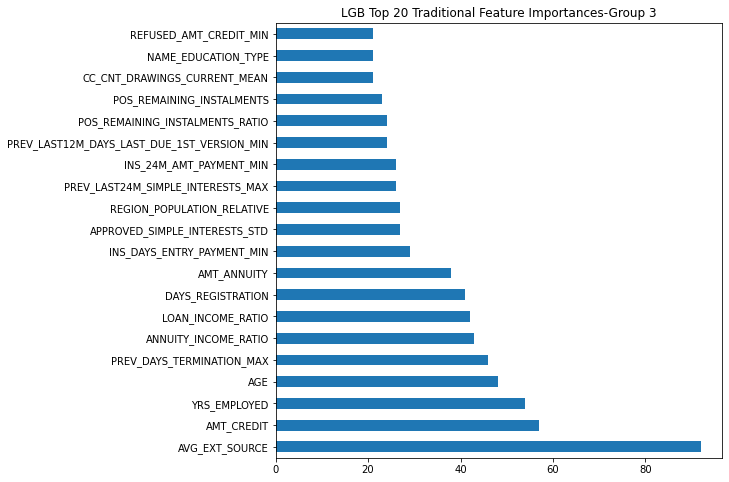

In [44]:
# access feature importances
# for traditional features
feat_imp = lgb.feature_importances_

lgb_feat_imp = pd.Series(feat_imp, features).sort_values(ascending=False)

# getting the top 20 features
lgb_top20 = lgb_feat_imp[:20]

# plot top 20 features
plt.figure(figsize=(8,8))
lgb_top20.plot(kind='barh', title='LGB Top 20 Traditional Feature Importances-Group 3')
plt.show();

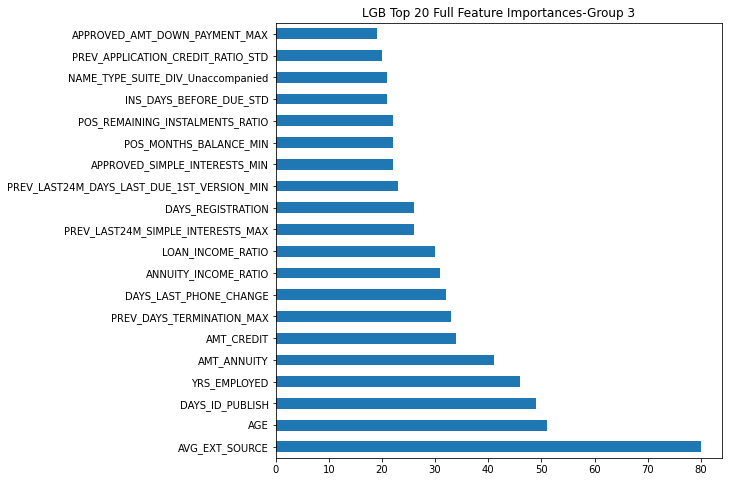

In [45]:
# access feature importances
# for full features
feat_imp_full = lgb_full.feature_importances_

lgb_feat_imp_full = pd.Series(feat_imp_full, features_full).sort_values(ascending=False)

# getting the top 20 features
lgb_top20_full = lgb_feat_imp_full[:20]

# plot top 20 features
plt.figure(figsize=(8,8))
lgb_top20_full.plot(kind='barh', title='LGB Top 20 Full Feature Importances-Group 3')
plt.show();

**XGB model:**<br>
There was improvement in AUC score of 0.007 in the average cross-val-score in the full features model to 0.722. Additionally, when scoring on the validation set, the AUC score on the full features model was 0.721, 0.09 points higher than the traditional model.  

**LGB model:**<br>
Likewise, there improvement in AUC score of 0.03 in the average cross-val-score in the full features model to 0.742. Addtionally, when tested on the validation set, the AUC score for full features was 0.741, 0.01 higher than the AUC score of 0.740 scored for the traditional features. 

Overall, the LGB model had a higher recall score, shown in the reduction of false negatives compared to the XGB model. The recall score for this group is lower than the scores achieved for for Group 1, but higher than what was scored for Group 2 and 4. This gives evidence that past lending history of the applicant do help in identifying applicants who are likely to default as well as improving the false negatives scoring. <br>

Looking at the feature importances based on the LGB model, the full features had a number of alternative features like `DAYS_ID_PUBLISH`, `DAYS_LAST_PHONE_CHANGE`, `NAME_TYPE_SUITE_DIV_Unaccompanied` in the top 20 features.  

### 3.4. Comparison of ROC Curve
[top](#Contents)

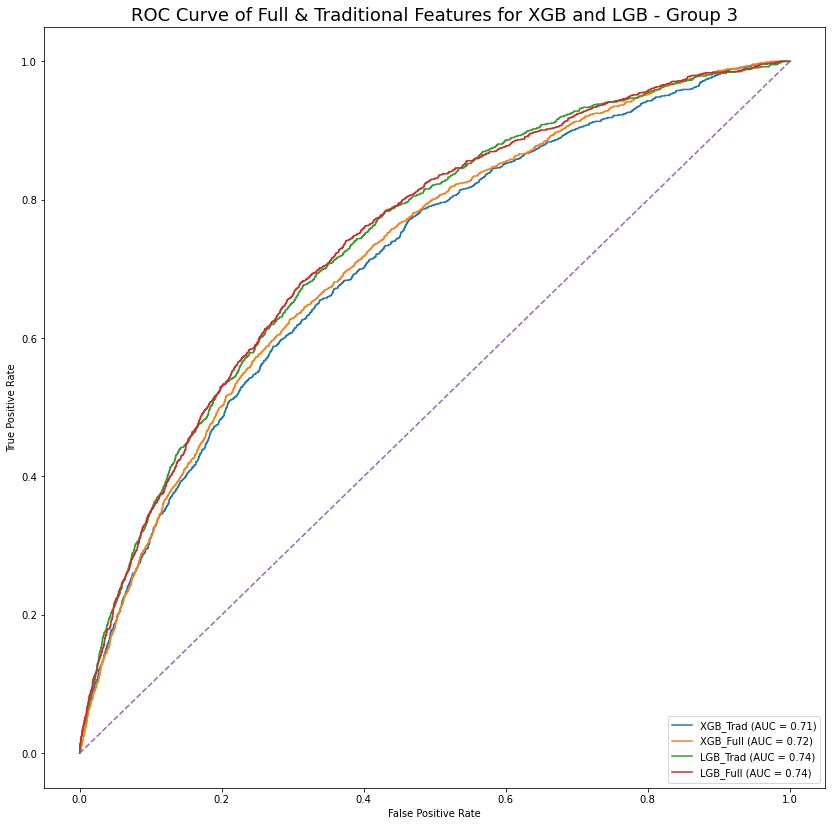

In [46]:
figure = plt.figure(figsize=(14,14))
ax = plt.gca()
xgb_chart = plot_roc_curve(xgb, X_val, y_val, name='XGB_Trad', ax=ax)
xgb_full_chart = plot_roc_curve(xgb_full, X_full_val, y_full_val, name='XGB_Full', ax=ax)

lgb_chart = plot_roc_curve(lgb, X_val, y_val, name='LGB_Trad', ax=ax)
lgb_full_chart = plot_roc_curve(lgb_full, X_full_val, y_full_val, name='LGB_Full', ax=ax)

ax.plot(np.linspace(0, 1, 200),
        np.linspace(0, 1, 200),
        linestyle='--')
plt.title('ROC Curve of Full & Traditional Features for XGB and LGB - Group 3', fontsize=18)
plt.show()

Similar to Group 1, the LGB model outperforms the XGB model in terms of AUC scores.

### 3.5. Examining the Impact of Different Sets of Alternative Features
[top](#Contents)

Similarly, from our initial alternative features, we can group these features based on their similar categories to observe the impact on the AUC scores:
- mobile and phone observations
- social network observations
- consistency observations
- routine observations

In [47]:
phone_obs = [
    'FLAG_EMP_PHONE', 
    'FLAG_WORK_PHONE', 
    'FLAG_CONT_MOBILE', 
    'FLAG_PHONE',
    'DAYS_LAST_PHONE_CHANGE',
]

social_obs = [
    'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 
    'AVG_OBS_CNT_SOCIAL_CIRCLE', 
    'AVG_DEF_CNT_SOCIAL_CIRCLE', 
    'RATIO_DEF_OBS_SOCIAL_CIRCLE',
]

consist_obs = [
    'TYPE_SUITE_FAMILY_STATUS_Children_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Children_Married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Children_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Family_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Family_Married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Family_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Married',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Widow',
]

# whether current application timing and/or people accompanying the application is similar to 
# previous applications
routine_obs = [
    'APPR_PROCESS_START_DIV_morning',
    'APPR_PROCESS_START_DIV_afternoon',
    'APPR_PROCESS_START_DIV_dusk',
    'NAME_TYPE_SUITE_DIV_Children', 
    'NAME_TYPE_SUITE_DIV_Family',
    'NAME_TYPE_SUITE_DIV_Group_of_people',
    'NAME_TYPE_SUITE_DIV_Other_A',
    'NAME_TYPE_SUITE_DIV_Other_B',
    'NAME_TYPE_SUITE_DIV_Spouse_partner',
    'NAME_TYPE_SUITE_DIV_Unaccompanied',
    'WEEKDAY_APPR_PROCESS_DIV_MONDAY',
    'WEEKDAY_APPR_PROCESS_DIV_TUESDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_WEDNESDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_THURSDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_FRIDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_SATURDAY', 
    'WEEKDAY_APPR_PROCESS_DIV_SUNDAY', 
]

#### Dropping phone observations features

In [48]:
# create set that drops selected features
train_3_phone = train_3.drop(phone_obs, axis=1)

X = train_3_phone.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_3_phone['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [49]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_phone = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_phone, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_phone.fit(X_train, y_train)
preds = lgb_phone.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb_phone.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb_phone.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7455829683473489
Cross-val-scores over 5 folds: [0.73886599 0.7410158  0.7453608  0.76188554 0.74078671]
AUC score on validation set: 0.7401678811659193

Confusion Matrix:
[[8938 2212]
 [ 615  665]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     11150
           1       0.23      0.52      0.32      1280

    accuracy                           0.77     12430
   macro avg       0.58      0.66      0.59     12430
weighted avg       0.86      0.77      0.81     12430



Average cross-val AUC actually increased 0.004 from 0.742 to 0.746, while the validation AUC fell 0.001 from 0.741 to 0.740. 

#### Dropping social observations features

In [50]:
# create set that drops selected features
train_3_social = train_3.drop(social_obs, axis=1)

X = train_3_social.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_3_social['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [51]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_social = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_social, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_social.fit(X_train, y_train)
preds = lgb_social.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb_social.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb_social.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7428111041498907
Cross-val-scores over 5 folds: [0.74612333 0.73552685 0.73973667 0.75134498 0.7413237 ]
AUC score on validation set: 0.7402903587443947

Confusion Matrix:
[[8974 2176]
 [ 626  654]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     11150
           1       0.23      0.51      0.32      1280

    accuracy                           0.77     12430
   macro avg       0.58      0.66      0.59     12430
weighted avg       0.86      0.77      0.81     12430



Similarly, average cross-val AUC actually increased 0.001 from 0.742 to 0.743, while the validation AUC fell 0.001 from 0.741 to 0.740. 

#### Dropping consistency observations features

In [52]:
# create set that drops selected features
train_3_consist = train_3.drop(consist_obs, axis=1)

X = train_3_consist.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_3_consist['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [53]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_consist = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_consist, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_consist.fit(X_train, y_train)
preds = lgb_consist.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb_consist.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb_consist.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7455375215572276
Cross-val-scores over 5 folds: [0.74101226 0.74158874 0.74403532 0.76466933 0.73638195]
AUC score on validation set: 0.7374517937219731

Confusion Matrix:
[[8967 2183]
 [ 625  655]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     11150
           1       0.23      0.51      0.32      1280

    accuracy                           0.77     12430
   macro avg       0.58      0.66      0.59     12430
weighted avg       0.86      0.77      0.81     12430



Likewise, average cross-val AUC actually increased 0.004 from 0.742 to 0.746, while the validation AUC fell 0.004 from 0.741 to 0.737. 

#### Dropping routine observations features

In [54]:
# create set that drops selected features
train_3_routine = train_3.drop(routine_obs, axis=1)

X = train_3_routine.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_3_routine['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [55]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_routine = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_routine, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_routine.fit(X_train, y_train)
preds = lgb_routine.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb_routine.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb_routine.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7445973122164411
Cross-val-scores over 5 folds: [0.74496844 0.7381083  0.74414411 0.7580107  0.73775502]
AUC score on validation set: 0.7464543862107623

Confusion Matrix:
[[8998 2152]
 [ 612  668]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     11150
           1       0.24      0.52      0.33      1280

    accuracy                           0.78     12430
   macro avg       0.59      0.66      0.60     12430
weighted avg       0.86      0.78      0.81     12430



Likewise, average cross-val AUC actually increased 0.003 from 0.742 to 0.745. Additionally the validation AUC increased 0.005 from 0.741 to 0.746. 

We observed a similar trend in group 2 where the average cross-val AUC increased but the validation AUC decreased. However, for our routine set of observations, dropping it actually increased both the average cross-val AUC as well as the validation AUC. This set of features likely ended up as 'noise' to the model instead of helping to improve the scoring.

## 4. Examining Impact of Alternative Features in Group 4
`New customers without bureau reports`<br>
[top](#Contents)

### 4.1. Scoring on Traditional Features
[top](#Contents)

In [4]:
# for group 4

alternative_feat_4 = [
    'DAYS_ID_PUBLISH',
    'FLAG_EMP_PHONE', 
    'FLAG_WORK_PHONE', 
    'FLAG_CONT_MOBILE', 
    'FLAG_PHONE',
    'REGION_RATING_CLIENT_W_CITY',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 
    'DAYS_LAST_PHONE_CHANGE', 
    'CAR_BINS',
    'FAM_MEMBERS_BIN', 
    'AVG_OBS_CNT_SOCIAL_CIRCLE', 
    'AVG_DEF_CNT_SOCIAL_CIRCLE', 
    'RATIO_DEF_OBS_SOCIAL_CIRCLE',
    'NAME_TYPE_SUITE_Children',
    'NAME_TYPE_SUITE_Family',
    'NAME_TYPE_SUITE_Group_of_people',
    'NAME_TYPE_SUITE_Other_A',
    'NAME_TYPE_SUITE_Other_B',
    'NAME_TYPE_SUITE_Spouse_partner',
    'NAME_TYPE_SUITE_Unaccompanied',
    'WEEKDAY_APPR_PROCESS_START_MONDAY',
    'WEEKDAY_APPR_PROCESS_START_TUESDAY',
    'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
    'WEEKDAY_APPR_PROCESS_START_THURSDAY',
    'WEEKDAY_APPR_PROCESS_START_FRIDAY',
    'WEEKDAY_APPR_PROCESS_START_SATURDAY',
    'WEEKDAY_APPR_PROCESS_START_SUNDAY',
    'NAME_FAMILY_STATUS_Civil_marriage',
    'NAME_FAMILY_STATUS_Married',
    'NAME_FAMILY_STATUS_Separated',
    'NAME_FAMILY_STATUS_Single_not_married',
    'NAME_FAMILY_STATUS_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Children_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Children_Married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Family_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Family_Married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Family_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Married',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Widow',
    'PROCESS_START_PERIOD_afternoon',
    'PROCESS_START_PERIOD_dusk',
    'PROCESS_START_PERIOD_morning',   
]

In [5]:
# create set that does not have the full alternative features
train_4_trad = train_4.drop(alternative_feat_4, axis=1)

X = train_4_trad.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_4_trad['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [58]:
# scoring on xgb model
print('Scoring on xgb model...')
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=['auc'], n_jobs=-1)

auc_roc = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

xgb.fit(X_train, y_train)
preds = xgb.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, xgb.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, xgb.predict(X_val)))

Scoring on xgb model...
Average training ROC cross-val-score over 5 folds: 0.6908069314599166
Cross-val-scores over 5 folds: [0.74027015 0.61890547 0.69320066 0.70735213 0.69430625]
AUC score on validation set: 0.6797995299985611

Confusion Matrix:
[[710   9]
 [ 57   1]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       719
           1       0.10      0.02      0.03        58

    accuracy                           0.92       777
   macro avg       0.51      0.50      0.49       777
weighted avg       0.86      0.92      0.89       777



In [59]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb.fit(X_train, y_train)
preds = lgb.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7168819212849064
Cross-val-scores over 5 folds: [0.76694139 0.67827529 0.68678828 0.72570481 0.72669983]
AUC score on validation set: 0.692508752577814

Confusion Matrix:
[[697  22]
 [ 51   7]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       719
           1       0.24      0.12      0.16        58

    accuracy                           0.91       777
   macro avg       0.59      0.55      0.56       777
weighted avg       0.88      0.91      0.89       777



### 4.2. Scoring on Full Features
[top](#Contents)

In [60]:
X_full = train_4.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y_full = train_4['TARGET']

X_full_train, X_full_val, y_full_train, y_full_val = train_test_split(X_full, y_full, test_size = 0.3, stratify=y, random_state=42)

In [61]:
# scoring on xgb model
print('Scoring on xgb model...')
xgb_full = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=['auc'], n_jobs=-1)

auc_roc = cross_val_score(xgb_full, X_full_train, y_full_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

xgb_full.fit(X_full_train, y_full_train)
preds = xgb_full.predict_proba(X_full_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_full_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_full_val, xgb_full.predict(X_full_val)))
print()
print('Classification report:')
print(classification_report(y_full_val, xgb_full.predict(X_full_val)))

Scoring on xgb model...
Average training ROC cross-val-score over 5 folds: 0.7245841078490333
Cross-val-scores over 5 folds: [0.78743132 0.66500829 0.7328911  0.75500276 0.68258706]
AUC score on validation set: 0.7189583233418061

Confusion Matrix:
[[712   7]
 [ 57   1]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       719
           1       0.12      0.02      0.03        58

    accuracy                           0.92       777
   macro avg       0.53      0.50      0.49       777
weighted avg       0.87      0.92      0.89       777



In [62]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_full = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_full, X_full_train, y_full_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_full.fit(X_full_train, y_full_train)
preds = lgb_full.predict_proba(X_full_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_full_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_full_val, lgb_full.predict(X_full_val)))
print()
print('Classification report:')
print(classification_report(y_full_val, lgb_full.predict(X_full_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7386728673482404
Cross-val-scores over 5 folds: [0.80414377 0.69331122 0.7209508  0.7580984  0.71686014]
AUC score on validation set: 0.7340655124454463

Confusion Matrix:
[[701  18]
 [ 51   7]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       719
           1       0.28      0.12      0.17        58

    accuracy                           0.91       777
   macro avg       0.61      0.55      0.56       777
weighted avg       0.88      0.91      0.89       777



### 4.3. Feature Importances
[top](#Contents)

In [63]:
features = X.columns
features_full = X_full.columns

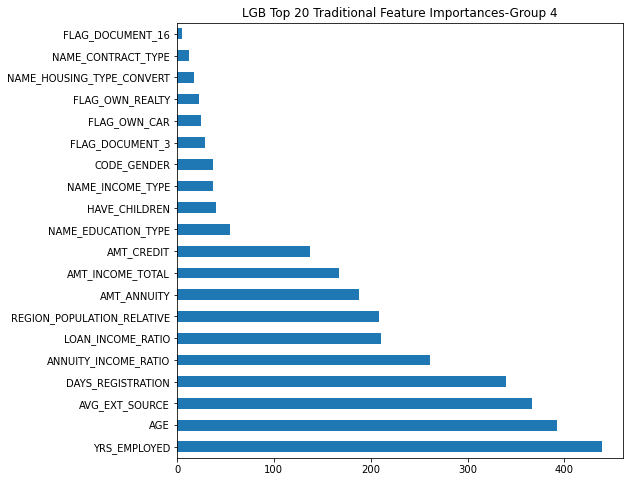

In [64]:
# access feature importances
# for traditional features
feat_imp = lgb.feature_importances_

lgb_feat_imp = pd.Series(feat_imp, features).sort_values(ascending=False)

# getting the top 20 features
lgb_top20 = lgb_feat_imp[:20]

# plot top 20 features
plt.figure(figsize=(8,8))
lgb_top20.plot(kind='barh', title='LGB Top 20 Traditional Feature Importances-Group 4')
plt.show();

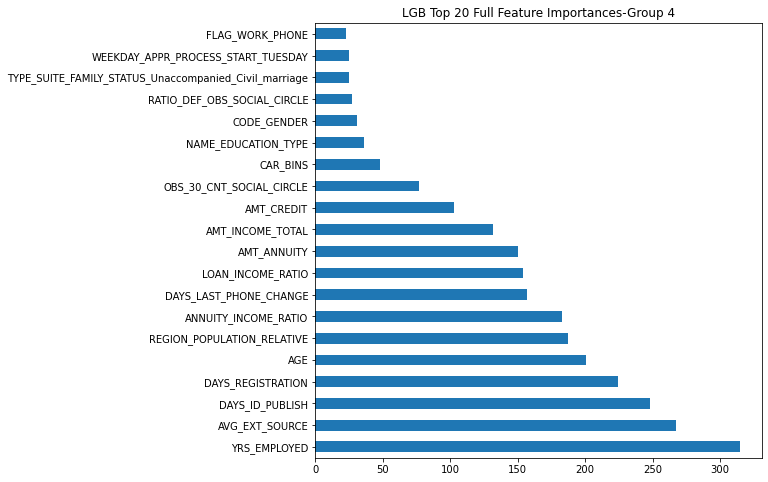

In [65]:
# access feature importances
# for full features
feat_imp_full = lgb_full.feature_importances_

lgb_feat_imp_full = pd.Series(feat_imp_full, features_full).sort_values(ascending=False)

# getting the top 20 features
lgb_top20_full = lgb_feat_imp_full[:20]

# plot top 20 features
plt.figure(figsize=(8,8))
lgb_top20_full.plot(kind='barh', title='LGB Top 20 Full Feature Importances-Group 4')
plt.show();

**XGB model:**<br>
There was significant improvement in AUC score of 0.034 in the average cross-val-score in the full features model to 0.725. Additionally, when scoring on the validation set, the AUC score on the full features model was 0.719, 0.04 points higher than the traditional model.  

**LGB model:**<br>
Likewise, there was significant improvement in AUC score of 0.026 in the average cross-val-score in the full features model to 0.739. Addtionally, when tested on the validation set, the AUC score for full features was 0.734, 0.041 higher than the AUC score of 0.693 scored for the traditional features. 

Overall, the LGB model had a higher recall score, shown in the reduction of false negatives compared to the XGB model. But the recall score for this group is much lower than the scores achieved for other groups, especially for Group 1. <br>

Furthermore, looking at the feature importances based on the LGB model, the full features had a number of alternative features like DAYS_ID_PUBLISH, DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE, OBS_30_CNT_SOCIAL_CIRCLE, and RATIO_DEF_OBS_SOCIAL_CIRCLE in the top 20 features. This provides evidence that the alternative features do contribute to improvement of model score as well as supplement the traditional features in identifying applicants who are likely to default. 

Additionally, for a group of customers who were new applicants and did not have credit bureau data, the scoring was improved to a respectable 0.734, 0.04 lower than the score achieved for Group 1 on traditional features, the group with the most extensive data.

### 4.4. Comparison of ROC Curve
[top](#Contents)

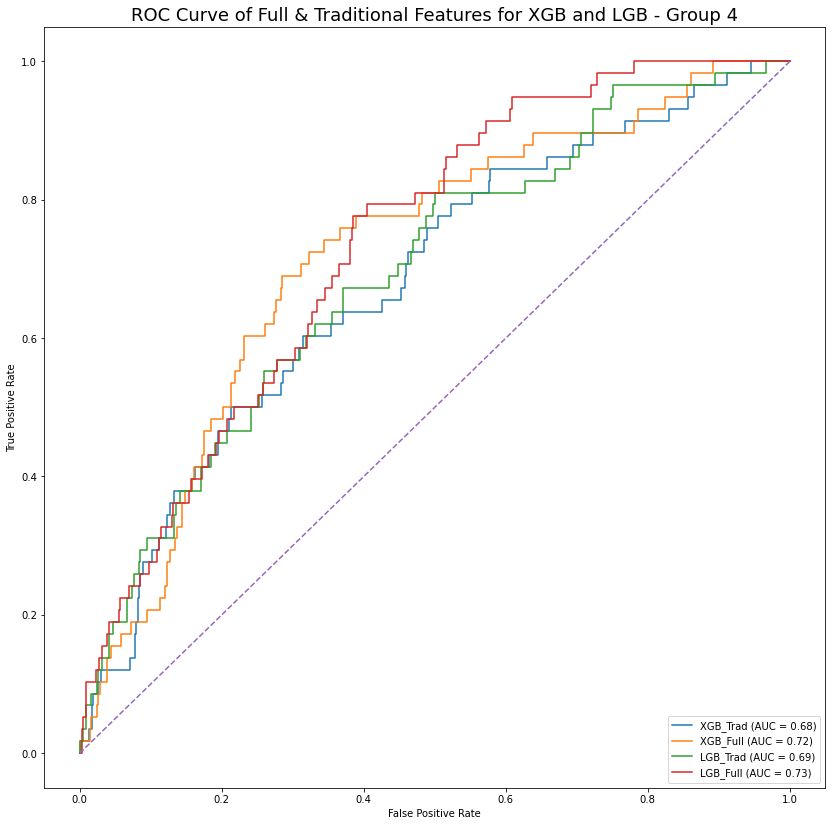

In [66]:
figure = plt.figure(figsize=(14,14))
ax = plt.gca()
xgb_chart = plot_roc_curve(xgb, X_val, y_val, name='XGB_Trad', ax=ax)
xgb_full_chart = plot_roc_curve(xgb_full, X_full_val, y_full_val, name='XGB_Full', ax=ax)

lgb_chart = plot_roc_curve(lgb, X_val, y_val, name='LGB_Trad', ax=ax)
lgb_full_chart = plot_roc_curve(lgb_full, X_full_val, y_full_val, name='LGB_Full', ax=ax)

ax.plot(np.linspace(0, 1, 200),
        np.linspace(0, 1, 200),
        linestyle='--')
plt.title('ROC Curve of Full & Traditional Features for XGB and LGB - Group 4', fontsize=18)
plt.show()

The LGB_Full model tends to outperform except for some portions where the XGB_Full model tends to be more dominant (0.4-0.75 True Positive Rate range).

### 4.5. Examining the Impact of Different Sets of Alternative Features
[top](#Contents)

Similarly, we group these features based on their similar categories to observe the impact on the AUC scores:
- mobile and phone observations
- social network observations
- consistency observations

In [67]:
phone_obs = [
    'FLAG_EMP_PHONE', 
    'FLAG_WORK_PHONE', 
    'FLAG_CONT_MOBILE', 
    'FLAG_PHONE',
    'DAYS_LAST_PHONE_CHANGE',
]

social_obs = [
    'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 
    'AVG_OBS_CNT_SOCIAL_CIRCLE', 
    'AVG_DEF_CNT_SOCIAL_CIRCLE', 
    'RATIO_DEF_OBS_SOCIAL_CIRCLE',
]

consist_obs = [
    'TYPE_SUITE_FAMILY_STATUS_Children_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Children_Married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Family_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Family_Married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Family_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Family_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Married',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Married',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Unaccompanied_Widow',
]

#### Dropping phone observations features

In [68]:
# create set that drops selected features
train_4_phone = train_4.drop(phone_obs, axis=1)

X = train_4_phone.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_4_phone['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [69]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_phone = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_phone, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_phone.fit(X_train, y_train)
preds = lgb_phone.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb_phone.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb_phone.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.720870904938069
Cross-val-scores over 5 folds: [0.75206044 0.65129906 0.74118297 0.7541183  0.70569375]
AUC score on validation set: 0.6905903793583041

Confusion Matrix:
[[703  16]
 [ 54   4]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       719
           1       0.20      0.07      0.10        58

    accuracy                           0.91       777
   macro avg       0.56      0.52      0.53       777
weighted avg       0.87      0.91      0.89       777



Average cross-val AUC decreased significantly by 0.018 from 0.739 to 0.721, and the validation AUC also fell 0.043 from 0.734 to 0.691

#### Dropping social observations features

In [70]:
# create set that drops selected features
train_4_social = train_4.drop(social_obs, axis=1)

X = train_4_social.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_4_social['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [71]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_social = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_social, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_social.fit(X_train, y_train)
preds = lgb_social.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb_social.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb_social.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7451340215892455
Cross-val-scores over 5 folds: [0.79510073 0.70348259 0.73576562 0.7620785  0.72924268]
AUC score on validation set: 0.7360558246606878

Confusion Matrix:
[[699  20]
 [ 51   7]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       719
           1       0.26      0.12      0.16        58

    accuracy                           0.91       777
   macro avg       0.60      0.55      0.56       777
weighted avg       0.88      0.91      0.89       777



Surprisingly, cross-val AUC increased by 0.006 from 0.739 to 0.745, and the validation AUC also increased 0.002 from 0.734 to 0.736

#### Dropping consistency observations features

In [72]:
# create set that drops selected features
train_4_consist = train_4.drop(consist_obs, axis=1)

X = train_4_consist.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_4_consist['TARGET']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [73]:
# scoring on light gb model
print('Scoring on lightgb model...')
lgb_consist = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

auc_roc = cross_val_score(lgb_consist, X_train, y_train, scoring='roc_auc', cv=5)
print(f'Average training ROC cross-val-score over 5 folds: {np.mean(auc_roc)}')

print(f'Cross-val-scores over 5 folds: {auc_roc}')

lgb_consist.fit(X_train, y_train)
preds = lgb_consist.predict_proba(X_val)[:,1]
print(f'AUC score on validation set: {roc_auc_score(y_val, preds)}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_val, lgb_consist.predict(X_val)))
print()
print('Classification report:')
print(classification_report(y_val, lgb_consist.predict(X_val)))

Scoring on lightgb model...
Average training ROC cross-val-score over 5 folds: 0.7378371725013515
Cross-val-scores over 5 folds: [0.79510073 0.7055832  0.71719182 0.75721393 0.71409619]
AUC score on validation set: 0.7351685770466645

Confusion Matrix:
[[703  16]
 [ 51   7]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       719
           1       0.30      0.12      0.17        58

    accuracy                           0.91       777
   macro avg       0.62      0.55      0.56       777
weighted avg       0.89      0.91      0.90       777



Average cross-val AUC decreased by 0.001 from 0.739 to 0.738, while validation AUC increased 0.001 from 0.734 to 0.735.

The surprise result was that removing the social set of features actually improved both the average cross-val AUC and validation AUC scores instead. Perhaps this insight indicates that new applicants without any credit bureau data should not be judged on how their peers are performing in terms of the loans they have and the default rates.

Another possible explanation was that our data points are too less, especially for group 4, such that dropping some of these features resulted in a less-sparse matrix which makes it easier for the tree based model to do their splits. 

Alternative features are not just limited to the data in Home Credit. As long as behaviour and personality proxies can be captured and digitize, it can be added as an alternative feature. Hence, this sub field is considered emerging with multiple experimenting and testing being done and more likely than not we should see more research and suggestions on how we can better improve the model scores. 

## 5. Generating Predictions on Test Set
[top](#Contents)

Since the Light GBM generally has a higher AUC and recall scores, it will be used for our final model tuning and predictions generation on the test set. Additionally, there are some features that were in the train set that were not in the test set and we will remove these when fitting the model: 

### 5.1. Fitting and Predicting: Group 1
[top](#Contents)

In [74]:
to_drop_for_train_1 = [
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Widow',
    'SK_ID_CURR',
    'TARGET'
]

In [75]:
test_1_id = test_1['SK_ID_CURR']

X = train_1.drop(to_drop_for_train_1, axis=1)
y = train_1['TARGET']

test_1 = test_1.drop('SK_ID_CURR', axis=1)

In [76]:
lgb_1 = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

lgb_1.fit(X, y)
pred_1 = lgb_1.predict_proba(test_1)
pred_1_default = [prob[1] for prob in pred_1]
submit_1 = pd.DataFrame()
submit_1['SK_ID_CURR'] = test_1_id
submit_1['TARGET'] = pred_1_default


### 5.2. Fitting and Predicting: Group 2
[top](#Contents)

In [77]:
to_drop_for_train_2 = [
    'NAME_TYPE_SUITE_Group_of_people',
    'TYPE_SUITE_FAMILY_STATUS_Children_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Children_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Children_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Married',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Widow',
    'SK_ID_CURR',
    'TARGET'
]

In [78]:
test_2_id = test_2['SK_ID_CURR']

X = train_2.drop(to_drop_for_train_2, axis=1)
y = train_2['TARGET']

test_2 = test_2.drop('SK_ID_CURR', axis=1)

In [79]:
lgb_2 = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

lgb_2.fit(X, y)
pred_2 = lgb_2.predict_proba(test_2)
pred_2_default = [prob[1] for prob in pred_2]
submit_2 = pd.DataFrame()
submit_2['SK_ID_CURR'] = test_2_id
submit_2['TARGET'] = pred_2_default

### 5.3. Fitting and Predicting: Group 3
[top](#Contents)

In [80]:
to_drop_for_train_3 = [
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Widow',
    'SK_ID_CURR',
    'TARGET'
]

In [81]:
test_3_id = test_3['SK_ID_CURR']

X = train_3.drop(to_drop_for_train_3, axis=1)
y = train_3['TARGET']

test_3 = test_3.drop('SK_ID_CURR', axis=1)

In [82]:
lgb_3 = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

lgb_3.fit(X, y)
pred_3 = lgb_3.predict_proba(test_3)
pred_3_default = [prob[1] for prob in pred_3]
submit_3 = pd.DataFrame()
submit_3['SK_ID_CURR'] = test_3_id
submit_3['TARGET'] = pred_3_default

### 5.4. Fitting and Predicting: Group 4
[top](#Contents)

In [83]:
to_drop_for_train_4 = [
    'NAME_TYPE_SUITE_Children',
    'NAME_TYPE_SUITE_Other_B',
    'TYPE_SUITE_FAMILY_STATUS_Children_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Children_Married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Children_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Family_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Family_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Group_of_people_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_A_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Civil_marriage',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Single_not_married',
    'TYPE_SUITE_FAMILY_STATUS_Other_B_Widow',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Separated',
    'TYPE_SUITE_FAMILY_STATUS_Spouse_partner_Single_not_married',    
    'SK_ID_CURR',
    'TARGET'
]


In [84]:
test_4_id = test_4['SK_ID_CURR']

X = train_4.drop(to_drop_for_train_4, axis=1)
y = train_4['TARGET']

test_4 = test_4.drop('SK_ID_CURR', axis=1)

In [85]:
lgb_4 = LGBMClassifier(metric='auc', random_state=42, n_jobs=-1, is_unbalance=True)

lgb_4.fit(X, y)
pred_4 = lgb_4.predict_proba(test_4)
pred_4_default = [prob[1] for prob in pred_4]
submit_4 = pd.DataFrame()
submit_4['SK_ID_CURR'] = test_4_id
submit_4['TARGET'] = pred_4_default

### 5.5. Submitting to Kaggle
[top](#Contents)

In [86]:
final = pd.concat([submit_1, submit_2, submit_3, submit_4])

In [87]:
final = final.sort_values('SK_ID_CURR')

In [88]:
final.to_csv('../datasets/submissions_final.csv', index=False)

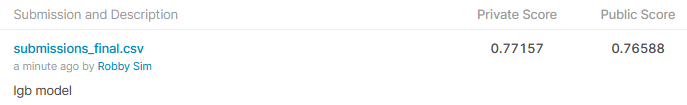